In [6]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

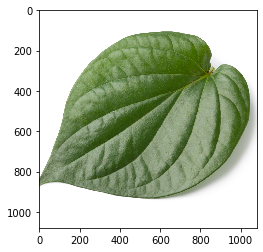

In [7]:
# read an image
img = cv2.imread(r'./DAUN-SIRIH.png')
im = mpimg.imread('./DAUN-SIRIH.png')

plt.imshow(im)


In [8]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

print(gray_img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


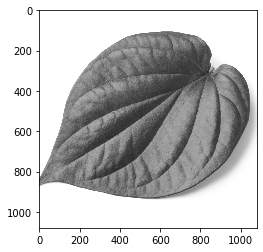

In [9]:
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

In [10]:
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])
        

In [11]:
imgs = [] #list image matrix 
labels = []
# descs = []

h, w =gray_img.shape
ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
crop = gray_img[ymin:ymax, xmin:xmax]
            
resize = cv2.resize(crop, (0,0), fx=0.6, fy=0.6)
       
imgs.append(resize)
labels.append('SIRIH1')
# descs.append(normalize_desc(folder, sub_folder))
            
# print_progress(i, len_sub_folder, folder, sub_folder, filename)      

In [12]:
cv2.imshow('Daun',imgs[0])

cv2.waitKey(0)
cv2.destroyAllWindows()

print(imgs)

[array([[160, 158, 151, ...,  63,  65,  61],
       [156, 156, 161, ...,  65,  61,  61],
       [162, 162, 163, ...,  60,  62,  59],
       ...,
       [105, 109, 102, ..., 154, 142, 142],
       [108, 107, 100, ..., 157, 145, 146],
       [103, 101, 103, ..., 148, 153, 150]], dtype=uint8)]


In [13]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['correlation', 'homogeneity', 'contrast', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [14]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

#save to csv
glcm_df.to_csv("glcm_daunsirih_dataset.csv")

glcm_df.head(7)

,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,homogeneity_90,homogeneity_135,contrast_0,contrast_45,contrast_90,contrast_135,energy_0,energy_45,energy_90,energy_135,label
0,0.861006,0.772408,0.857589,0.936562,0.110664,0.098633,0.115076,0.12939,403.991202,662.270804,414.276725,184.513328,0.018621,0.017044,0.018516,0.020362,SIRIH1
